# Практическая работа №7
## Тема: «Face Recognition | Распознование лица»
### Выполнил студент: Абрамов Руслан Закирович
#### ВАРИАНТ: 1


## При первом обнаружении лица программа может зависнуть. Нужно записать имя в терминале, так может потребоваться сделать несколько раз для улучшения распознавания лица

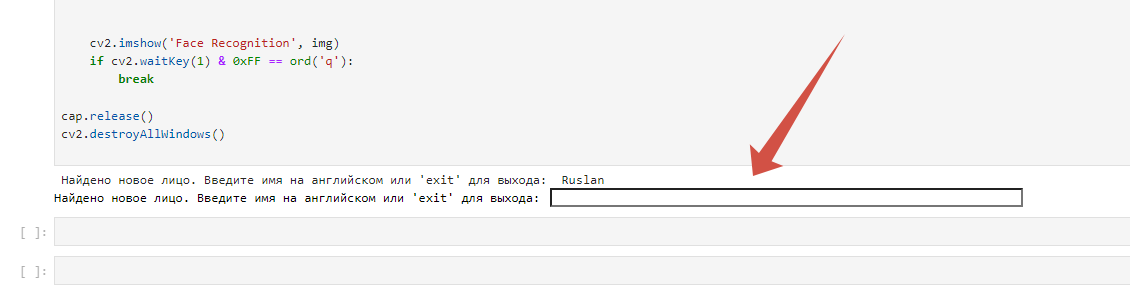

## Пример с одним лицом

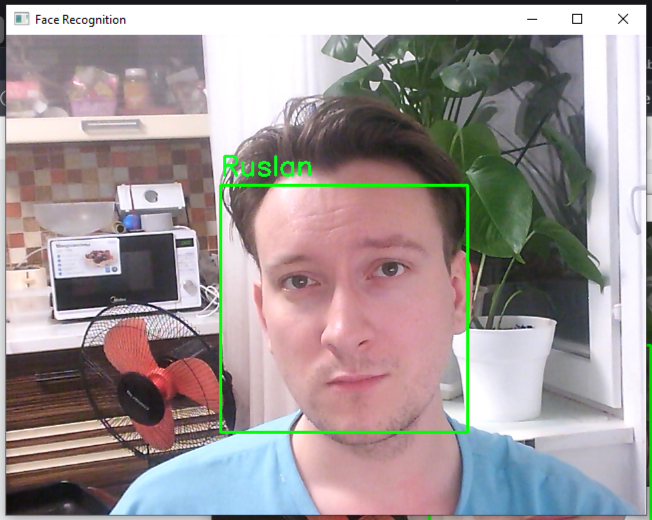

## Пример с двумя лицами

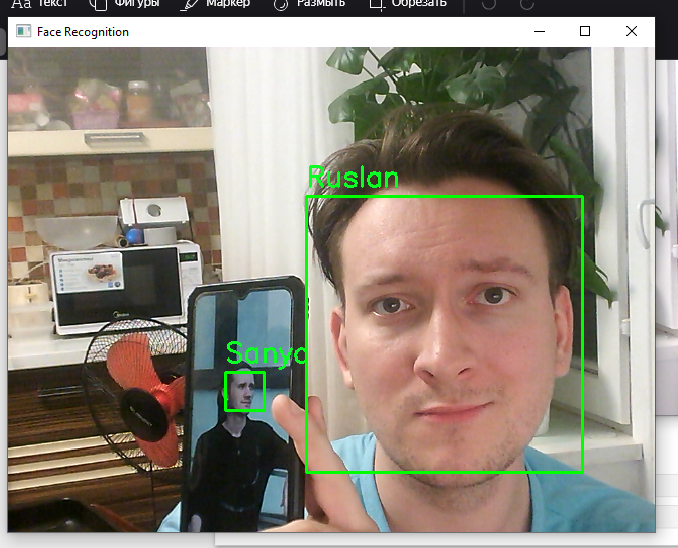

In [ ]:
import cv2
import face_recognition
import os

# Инициализация классификатора для обнаружения лиц
face_cascade_db = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Путь к директории для хранения изображений лиц
faces_dir = 'face_images'

# Инициализация VideoCapture
cap = cv2.VideoCapture(0)

known_faces_encodings = []
known_faces_names = []

while True:
    success, img = cap.read()
    if not success:
        break
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_db.detectMultiScale(img_gray)
    
    for (x, y, w, h) in faces:
        face_img = img[y:y+h, x:x+w]
        face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_encodings = face_recognition.face_encodings(face_img_rgb)
        
        if len(face_encodings) > 0:
            face_encoding = face_encodings[0]  # Получение кодировки текущего лица
            matches = face_recognition.compare_faces(known_faces_encodings, face_encoding)
            name = "Unknown"
            
            if True in matches:
                first_match_index = matches.index(True)
                name = known_faces_names[first_match_index]
            else:
                # Если лицо неизвестное, предлагаем пользователю ввести имя и сохранить его
                name = input("Найдено новое лицо. Введите имя на английском или 'exit' для выхода: ")  # Получение ввода из консоли
                if name.lower()!= 'exit':
                    known_faces_names.append(name)
                    # Использование cv2.imwrite для сохранения изображения
                    cv2.imwrite(os.path.join(faces_dir, f"{name}.jpg"), face_img)
                    known_faces_encodings.append(face_encoding)
            
            # Отображение имени над квадратом лица
            cv2.putText(img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
            # Отрисовка квадрата вокруг лица
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
            
    cv2.imshow('Face Recognition', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
